# 1. Problem statement¶¶
* This data set contain details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.So bank will provide some more services and makes sures to not to leave the bank.

# 2. Data collection
The dataset was collected from kaggle. Link for dataset https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data?select=Churn_Modelling.csv

# 3. Data Ingestion

Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 4. Data Cleaning

Checking for null values and duplicate values

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Here it is observed that there are two feature that are categorical, two are float type and remaining are of integer type only.

In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

# 5. EDA

In [8]:
df.sample(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9225,594,Germany,Female,32,4,120074.97,2,1,1,162961.79,0
3211,686,Germany,Female,27,1,115095.88,2,0,0,78622.46,0
3681,676,France,Female,40,2,147803.48,1,1,0,95181.06,1
2949,519,Spain,Male,39,4,111900.14,1,1,1,97577.17,0
3542,692,Spain,Female,34,4,109699.08,1,1,1,37898.91,0
2794,646,France,Male,52,8,59669.43,1,0,0,172495.81,1


#### 𝐀𝐭𝐭𝐫𝐢𝐛𝐮𝐭𝐞𝐬 𝐢𝐧𝐟𝐨𝐫𝐦𝐚𝐭𝐢𝐨𝐧 :¶
* CreditScore:Credit score of the customer.
* Geography :The country from which the customer belongs.
* Gender :Male or Female.
* Age :Age of the customer.
* Tenure :Number of years for which the customer has been with the bank.
* Balance :Bank balance of the customer.
* NumOfProducts :Number of bank products the customer is utilising.
* HasCrCard :Customer has credit card or not.
* IsActiveMember :Customer is active or not in the bank.
* EstimatedSalary : Estimated salary of the customer.
* Exited : Whether a customer is left the bank or not.

In [10]:
df.shape

(10000, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Here it can be seen that the number of 1's is very less as compared to number of 0's. So that dataset is imbalanced dataset.

𝐒𝐞𝐩𝐚𝐫𝐚𝐭𝐢𝐧𝐠 𝐧𝐮𝐦𝐞𝐫𝐢𝐜𝐚𝐥 𝐚𝐧𝐝 𝐜𝐚𝐭𝐞𝐠𝐨𝐫𝐢𝐜𝐚𝐥 𝐟𝐞𝐚𝐭𝐮𝐫𝐞𝐬

In [13]:
num_feature= [fea for fea in df.columns if df[fea].dtype !=object]
cat_feature= [fea for fea in df.columns if df[fea].dtype==object]

In [14]:
print("We have {} Numerical features : {}".format(len(num_feature),num_feature))
print()
print("We have {} Categorical features : {}".format(len(cat_feature),cat_feature))

We have 9 Numerical features : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

We have 2 Categorical features : ['Geography', 'Gender']


#### Statistical Description

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


#### Univariate Analysis

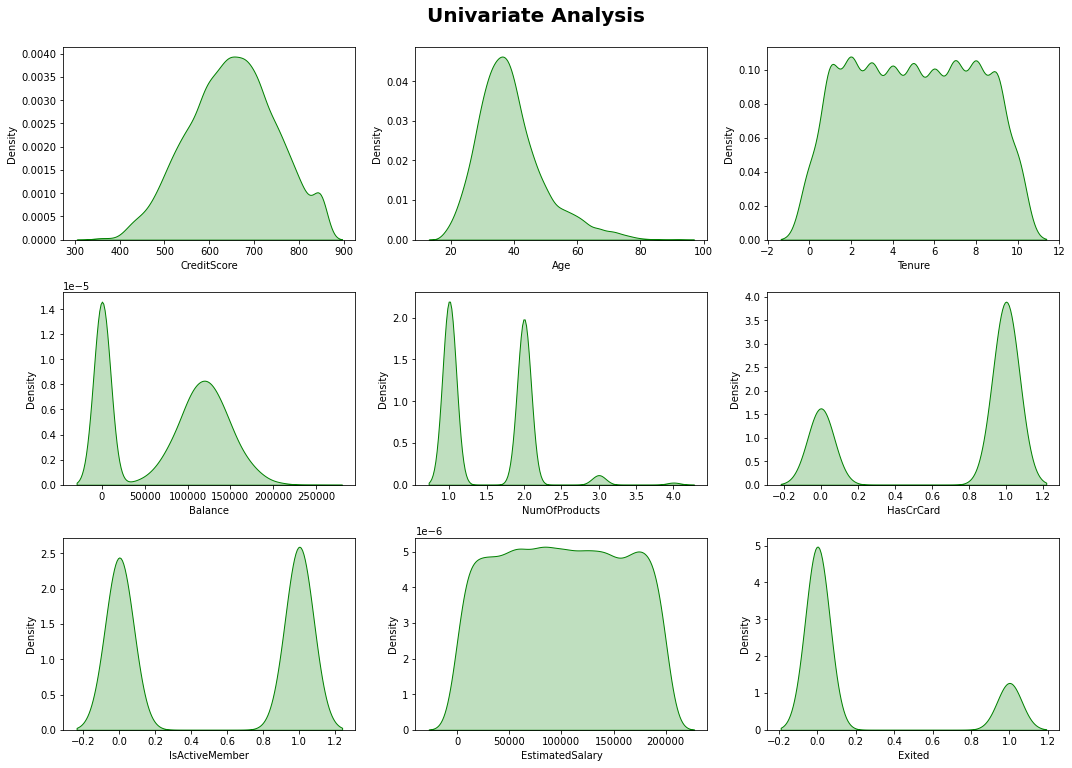

In [16]:
plt.figure(figsize=(15,17))
plt.suptitle('Univariate Analysis',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_feature[i]],shade=True,color='g')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

Observations

* Age, CreditScore, Tenure, Estimated salary are normally distributed.
* Most of customer are using only 1 and 2 products.
* HasCrCard is havily left skewed.
* Almost 50% of the customefr are not active.

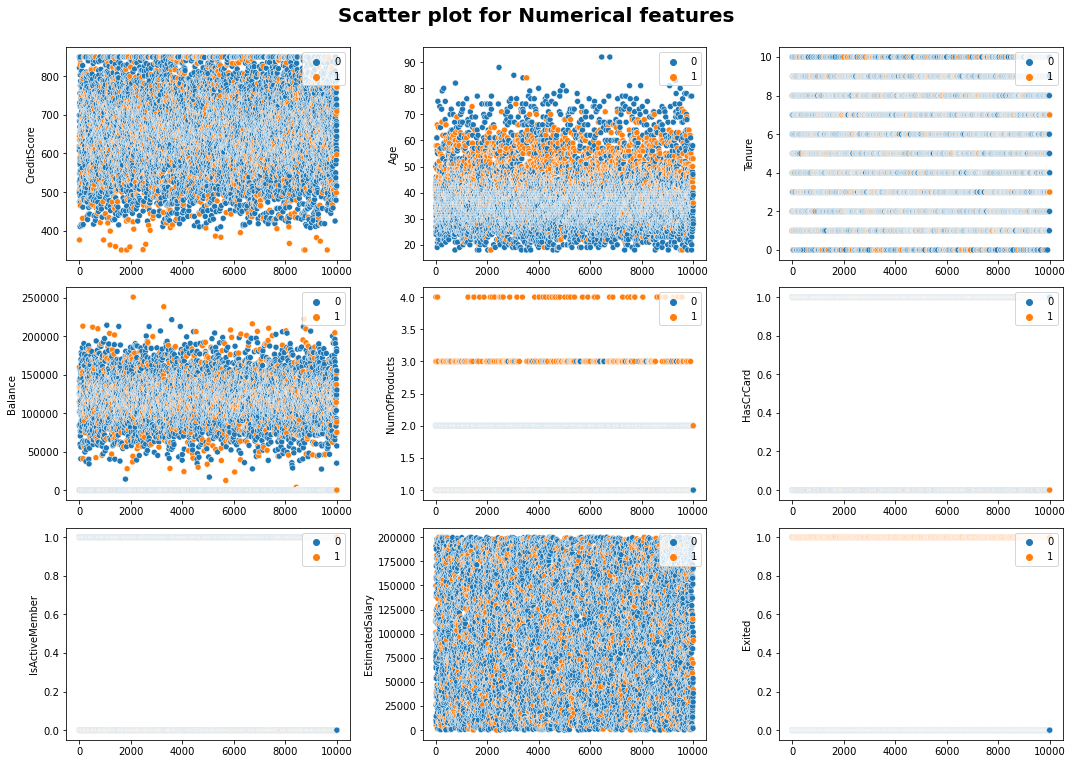

In [18]:
plt.figure(figsize=(15,17))
plt.suptitle('Scatter plot for Numerical features',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=num_feature[i],x=df.index,data=df,color='b',hue='Exited')
    plt.legend(loc="upper right")
    plt.tight_layout()

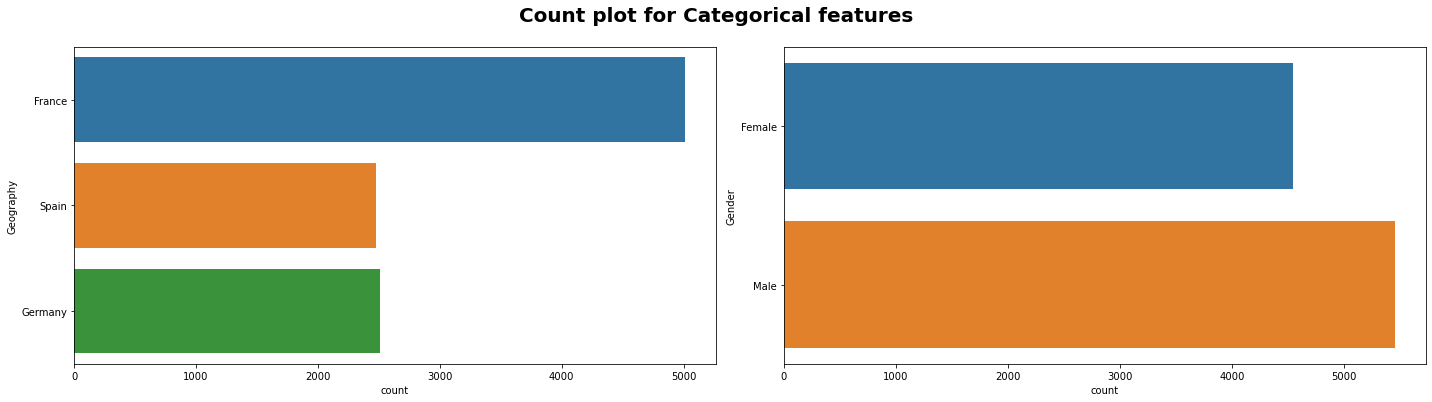

In [19]:
plt.figure(figsize=(20,40))
plt.suptitle('Count plot for Categorical features',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(cat_feature)):
    plt.subplot(8,2,i+1)
    sns.countplot(y=cat_feature[i],data=df)
    plt.tight_layout()

𝐁𝐢𝐯𝐚𝐫𝐢𝐚𝐭𝐞 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬

<Figure size 1440x2880 with 0 Axes>

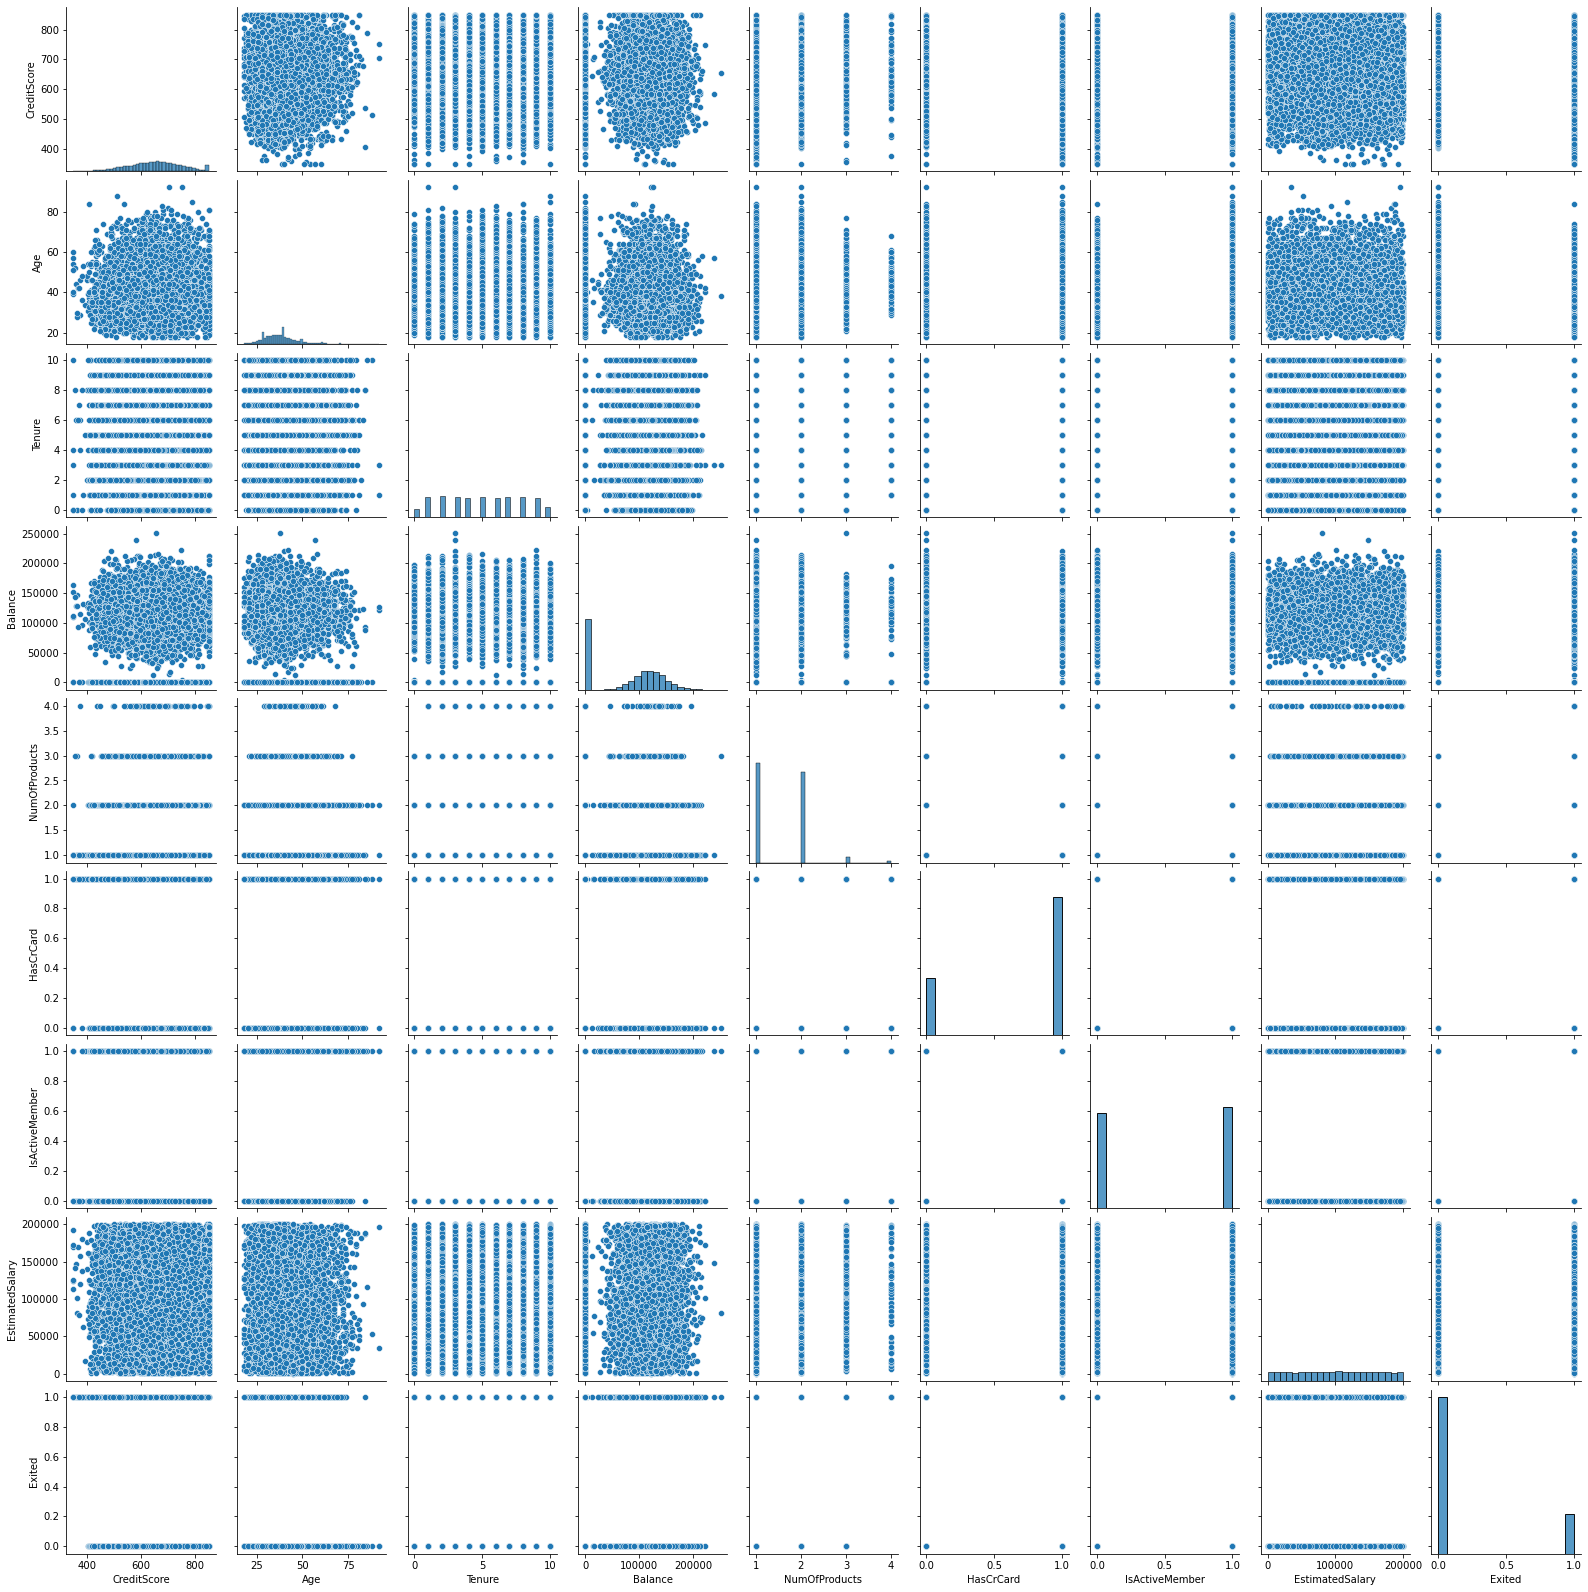

In [20]:
plt.figure(figsize=(20,40))
sns.pairplot(df)
plt.show()

𝐁𝐢𝐯𝐚𝐫𝐢𝐚𝐭𝐞 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐰.𝐫.𝐭. 𝐓𝐚𝐫𝐠𝐞𝐭 𝐕𝐚𝐫𝐢𝐚𝐛𝐥𝐞

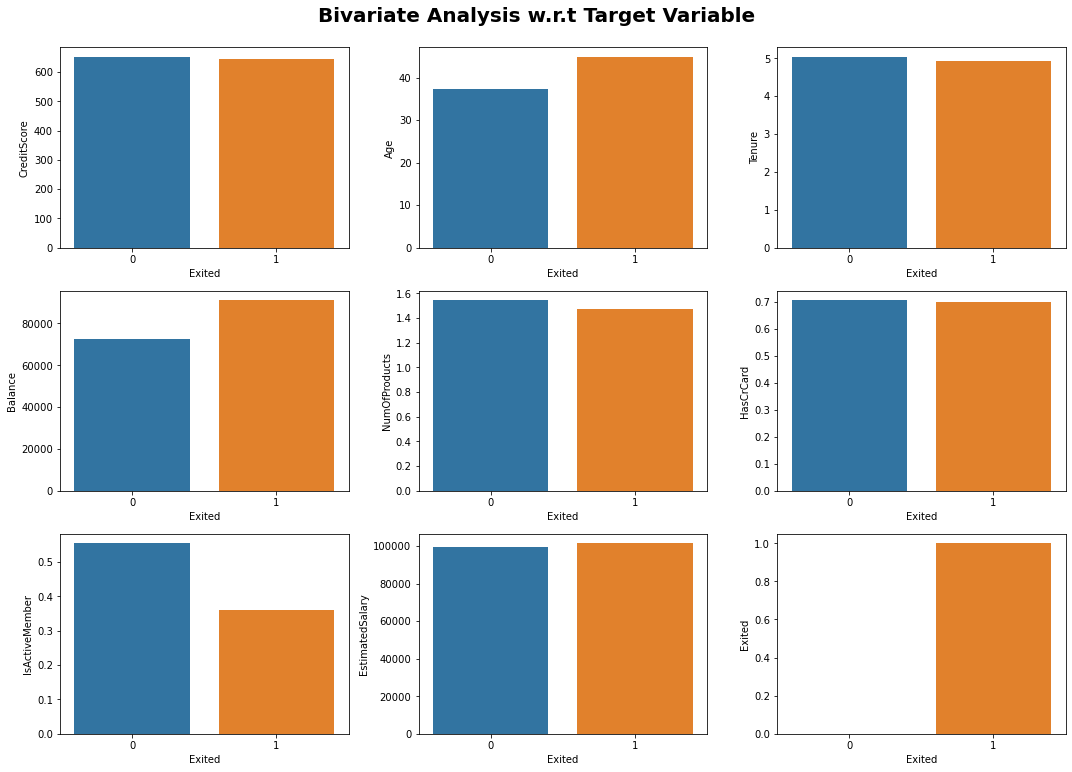

In [21]:
plt.figure(figsize=(15,17))
plt.suptitle('Bivariate Analysis w.r.t Target Variable',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=num_feature[i],x='Exited',data=df,ci=0)
    plt.tight_layout()

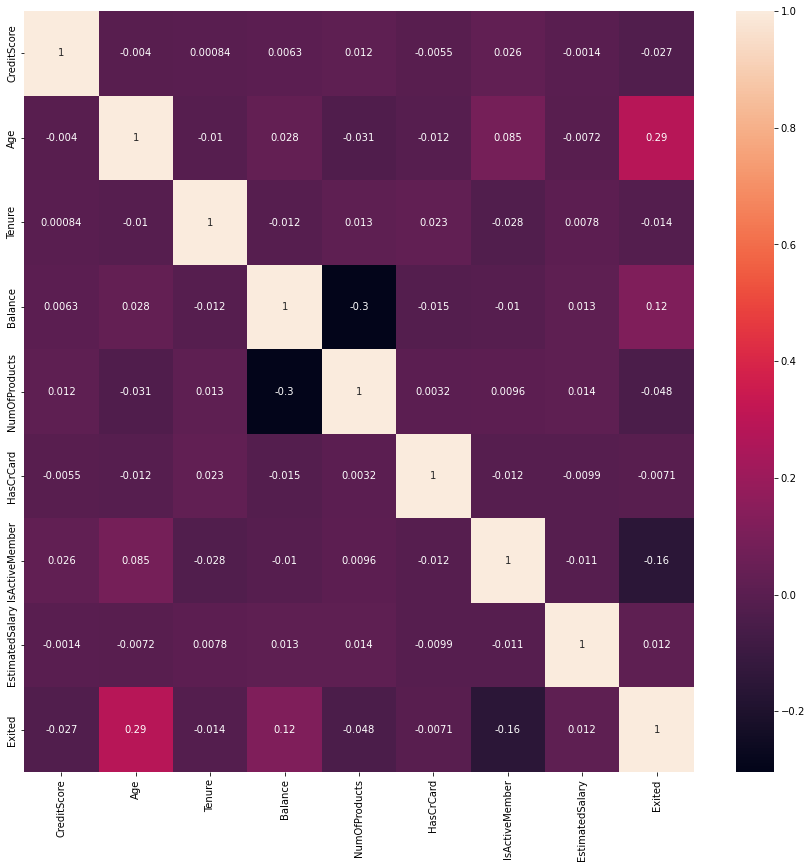

In [22]:
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(),annot=True)
plt.show()

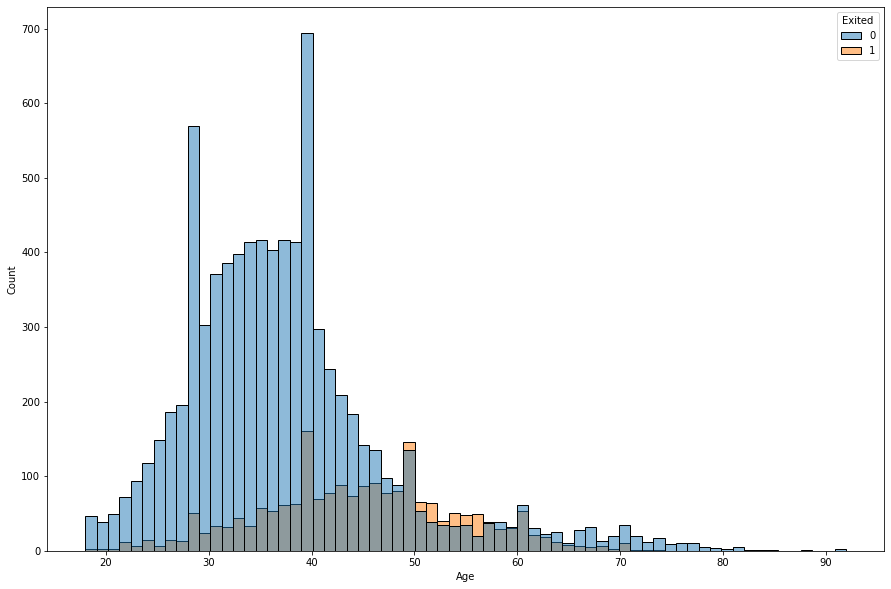

In [23]:
plt.figure(figsize=(15,10))
sns.histplot(x='Age',hue='Exited',data=df)
plt.show()

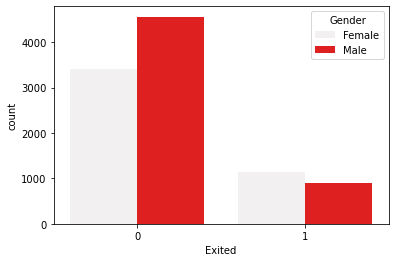

In [24]:
sns.countplot(x=df.Exited,hue=df.Gender,color='red')
plt.show()

<AxesSubplot:xlabel='Exited', ylabel='count'>

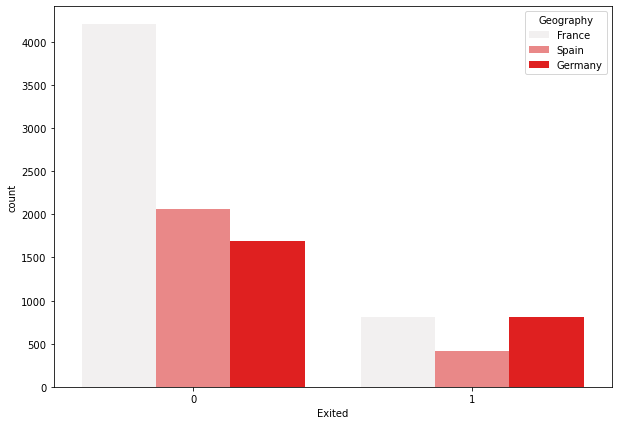

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x='Exited',hue='Geography',data=df,color='red')

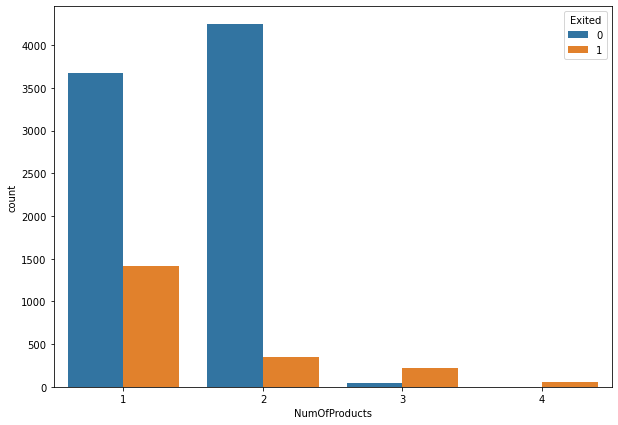

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x='NumOfProducts',hue='Exited',data=df)
plt.show()

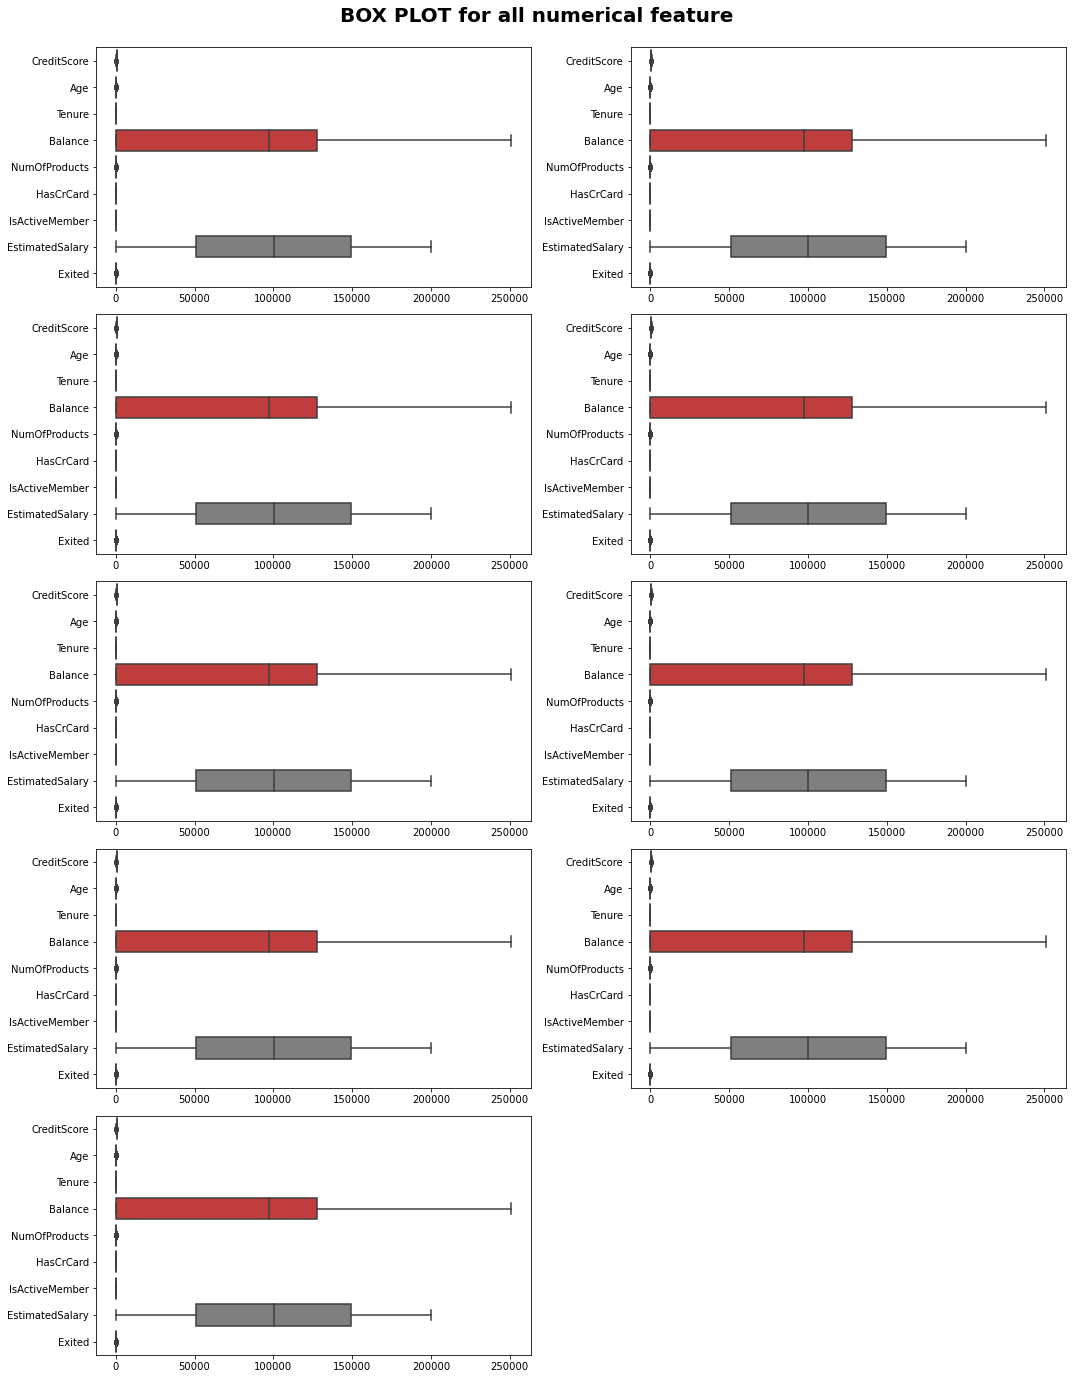

In [27]:
plt.figure(figsize=(15,30))
plt.suptitle('BOX PLOT for all numerical feature',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(8,2,i+1)
    sns.boxplot(data=df[num_feature],orient='h')
    plt.tight_layout()

# 6. Data Preprocessing

𝐟𝐞𝐚𝐭𝐮𝐫𝐞 𝐞𝐧𝐜𝐨𝐝𝐢𝐧𝐠 𝐭𝐨 𝐜𝐨𝐯𝐞𝐫𝐭 𝐭𝐡𝐞 𝐜𝐚𝐭𝐞𝐠𝐨𝐫𝐢𝐜𝐚𝐥 𝐟𝐞𝐚𝐭𝐮𝐫𝐞𝐬 𝐢𝐧𝐭𝐨 𝐧𝐮𝐦𝐞𝐫𝐢𝐜𝐚𝐥 𝐯𝐚𝐥𝐮𝐞𝐬

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
#Now doing one_hot_encoding to convert categorical features into numerical feature
df1=pd.get_dummies(data=df,columns=['Gender','Geography'],drop_first=True)

In [30]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [44]:
X=df1.drop(['Exited'],axis=1)
Y=df1['Exited']
X.shape,Y.shape

((10000, 11), (10000,))

In [45]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [46]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

#### Balancing the datset by using oversampling technique

In [49]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek()
X_res,Y_res=smk.fit_resample(X,Y)

In [52]:
X_res.shape,Y_res.shape

((13740, 11), (13740,))

𝐒𝐩𝐥𝐢𝐭𝐭𝐢𝐧𝐠 𝐭𝐡𝐞 𝐝𝐚𝐭𝐚𝐬𝐞𝐭 𝐢𝐧𝐭𝐨 𝐭𝐫𝐚𝐢𝐧 𝐚𝐧𝐝 𝐭𝐞𝐬𝐭 𝐝𝐚𝐭𝐚

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.2,random_state=0)

#### Feature scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
X_train

array([[-0.17256248,  0.20043958, -0.64755569, ...,  1.2011106 ,
         1.70760782, -0.46250942],
       [-1.22517449,  0.89766485, -1.37636665, ..., -0.8325628 ,
        -0.58561456,  2.16211812],
       [-1.65481204, -0.29757847, -1.01196117, ..., -0.8325628 ,
        -0.58561456, -0.46250942],
       ...,
       [ 1.00894079, -0.5963893 ,  1.17447169, ..., -0.8325628 ,
        -0.58561456, -0.46250942],
       [ 1.19153675, -0.69599291,  0.81006621, ..., -0.8325628 ,
         1.70760782, -0.46250942],
       [-0.94591008, -1.99083985, -0.28315022, ...,  1.2011106 ,
        -0.58561456, -0.46250942]])

In [56]:
X_test

array([[-1.37554763, -0.19797486,  0.44566074, ..., -0.8325628 ,
        -0.58561456, -0.46250942],
       [-0.99961478, -0.09837125, -0.64755569, ..., -0.8325628 ,
        -0.58561456, -0.46250942],
       [ 0.56856229, -0.09837125, -1.37636665, ..., -0.8325628 ,
        -0.58561456, -0.46250942],
       ...,
       [ 1.00894079,  0.30004319,  0.81006621, ..., -0.8325628 ,
        -0.58561456, -0.46250942],
       [-1.46147515, -1.09440736,  0.08125526, ...,  1.2011106 ,
        -0.58561456, -0.46250942],
       [ 0.80486295, -0.19797486,  0.44566074, ..., -0.8325628 ,
        -0.58561456, -0.46250942]])

In [58]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((10992, 11), (2748, 11), (10992,), (2748,))

# Building the model

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU

In [60]:
#Lets initialize ANN
classifier=Sequential()

In [61]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [62]:
#adding the second first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [63]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [64]:
#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [65]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
#Early stopping i.e. when accuracy is not increasing automatically the trainning of the model stops
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [67]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
737/737 [==============================] - 4s 3ms/step - loss: 0.5596 - accuracy: 0.7235 - val_loss: 0.4836 - val_accuracy: 0.7748
Epoch 2/1000
737/737 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.7871 - val_loss: 0.4601 - val_accuracy: 0.7836
Epoch 3/1000
737/737 [==============================] - 1s 2ms/step - loss: 0.4484 - accuracy: 0.7959 - val_loss: 0.4502 - val_accuracy: 0.7867
Epoch 4/1000
737/737 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.7981 - val_loss: 0.4413 - val_accuracy: 0.7947
Epoch 5/1000
737/737 [==============================] - 1s 2ms/step - loss: 0.4270 - accuracy: 0.8055 - val_loss: 0.4357 - val_accuracy: 0.7974
Epoch 6/1000
737/737 [==============================] - 2s 2ms/step - loss: 0.4190 - accuracy: 0.8078 - val_loss: 0.4293 - val_accuracy: 0.8037
Epoch 7/1000
737/737 [==============================] - 2s 2ms/step - loss: 0.4123 - accuracy: 0.8134 - val_loss: 0.4205 - val_accuracy:

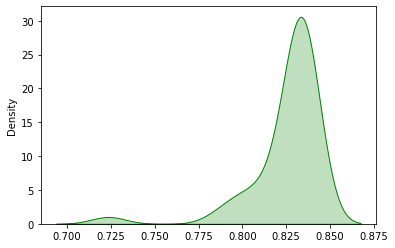

In [68]:
sns.kdeplot(x=model_history.history['accuracy'],shade=True,color='g')
plt.show()

In [69]:
classifier.get_weights()

[array([[-1.72499388e-01, -4.13168579e-01,  1.73295534e-03,
         -7.17271447e-01, -3.19108605e-01,  6.20090544e-01,
          5.34750186e-02, -3.93206924e-01,  5.27624823e-02,
          2.17559278e-01, -7.20081106e-02],
        [-3.61523032e-01,  2.92276442e-01, -7.97822550e-02,
         -7.32995346e-02, -4.57020104e-01, -4.84671503e-01,
          3.34728628e-01,  1.13767755e+00, -1.23424806e-01,
         -5.00905871e-01,  3.81488085e-01],
        [-5.96839905e-01, -2.12532997e-01, -5.65209799e-02,
          3.83550465e-01, -3.10950339e-01, -4.81842086e-02,
          3.66405360e-02, -1.31070539e-01,  2.32308969e-01,
          2.23463252e-01, -4.67995368e-02],
        [-3.46195489e-01,  5.91780722e-01, -7.66838193e-01,
         -1.88577712e-01,  3.81615669e-01, -4.25125062e-01,
         -4.28914011e-01, -1.72763661e-01, -7.69922733e-01,
         -3.45879585e-01,  2.67290384e-01],
        [-2.50920534e-01,  7.64590681e-01, -1.22063470e+00,
         -7.95760229e-02, -3.68450165e-01, -

In [70]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

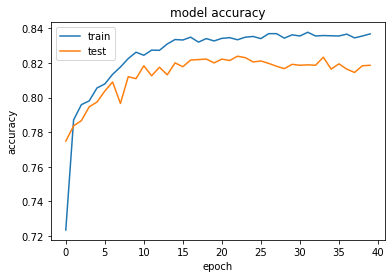

In [71]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

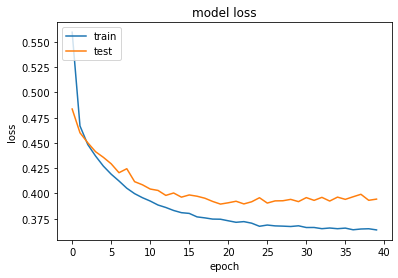

In [72]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [73]:
#Making the predictions and evaluating the model
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

86/86 [==============================] - 1s 2ms/step


In [74]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1121,  195],
       [ 293, 1139]], dtype=int64)

In [75]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.8224163027656477